<a href="https://colab.research.google.com/github/Feiquanl/CS5100Project/blob/main/total50Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
# Read in data
df = pd.read_csv("Book_1_50.csv")
print(df.shape)
#df = df.head(500)
columns_to_check=["reviewText","summary"]
df = df.dropna(subset=columns_to_check)
print(df.shape)

(43148, 12)
(43117, 12)


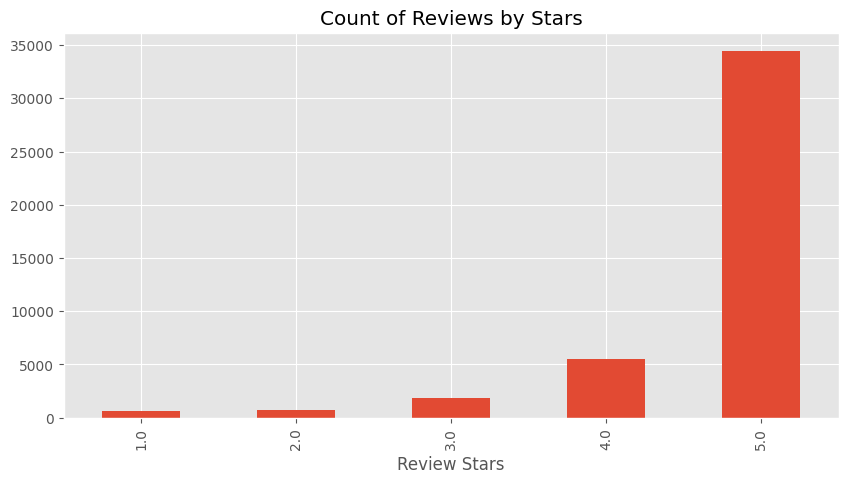

In [67]:

# Now, count the occurrences of each unique value in the 'overall' column of the filtered DataFrame
# and then sort these counts based on the index, which in this case is the review rating value itself.
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot the counts as a bar chart.
          title=f'Count of Reviews by Stars',  # Set the title of the plot, including the ASIN.
          figsize=(10, 5))  # Set the size of the plot to 10 inches wide by 5 inches tall.

# Set the label for the x-axis of the plot to 'Review Stars'.
ax.set_xlabel('Review Stars')

# Display the plot.
plt.show()

In [68]:
#Extract one book to an new df and reset the index to start from 0
new_df=df.copy()
new_df = new_df.reset_index(drop=True)
# Reset the index and add the old index as a new column called 'ID'
# Add a new column to new_df and  start IDs from 1 instead of 0
new_df['Id'] = range(1, len(new_df) + 1)
print(new_df.head())
#print(new_df.shape)
example =new_df['reviewText'][50]
print(example)

   overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True   04 5, 2018  A3OFV8AGCZBR4Q  0061900621   
1      5.0      True  03 20, 2018   AFRZEPUFQ5MMC  0061900621   
2      5.0      True   03 7, 2018  A1S1CPDH3FQJGW  0061900621   
3      5.0      True   02 6, 2018   AV4H0HWXRJN7C  0061900621   
4      5.0      True  01 25, 2018   AGQHMKOP1I3DL  0061900621   

                       style      reviewerName  \
0  {'Format:': ' Hardcover'}    Marko Petrovic   
1  {'Format:': ' Hardcover'}         Mr. Frank   
2  {'Format:': ' Hardcover'}             TMH21   
3  {'Format:': ' Hardcover'}              Sara   
4  {'Format:': ' Paperback'}  Nancy Blaskewicz   

                                          reviewText  \
0  My first born daughter loves this book and enj...   
1                                   daughter like it   
2  I gave this book to a two and a half year old ...   
3  My daughter loves babies and telling her shes ...   
4  This is the perfect book 

In [69]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Decent', 'read', 'for', 'kids', 'who', 'are', 'about', 'to', 'get', 'a']

In [70]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Decent', 'NNP'),
 ('read', 'NN'),
 ('for', 'IN'),
 ('kids', 'NNS'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('about', 'IN'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('a', 'DT')]

In [71]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Decent/NNP)
  read/NN
  for/IN
  kids/NNS
  who/WP
  are/VBP
  about/IN
  to/TO
  get/VB
  a/DT
  baby/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [72]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
# Run the polarity score on the 50 books
res = {}
for i, row in tqdm(new_df.iterrows(), total=len(new_df)):
    text = row['reviewText']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
for idx, (key, value) in enumerate(res.items()):
    if idx < 3:  # Check to print only the first 3 items
        print(f"ID: {key}, Scores: {value}")

  0%|          | 0/43117 [00:00<?, ?it/s]

ID: 1, Scores: {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.7906}
ID: 2, Scores: {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
ID: 3, Scores: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.4019}


In [74]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(new_df, how='left')

In [75]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,1,0.000,0.696,0.304,0.7906,4.0,True,"04 5, 2018",A3OFV8AGCZBR4Q,0061900621,{'Format:': ' Hardcover'},Marko Petrovic,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400,NaN,NaN
1,2,0.000,0.444,0.556,0.3612,5.0,True,"03 20, 2018",AFRZEPUFQ5MMC,0061900621,{'Format:': ' Hardcover'},Mr. Frank,daughter like it,Five Stars,1521504000,NaN,NaN
2,3,0.000,0.895,0.105,0.4019,5.0,True,"03 7, 2018",A1S1CPDH3FQJGW,0061900621,{'Format:': ' Hardcover'},TMH21,I gave this book to a two and a half year old ...,A great gift.,1520380800,NaN,NaN
3,4,0.000,0.680,0.320,0.9056,5.0,True,"02 6, 2018",AV4H0HWXRJN7C,0061900621,{'Format:': ' Hardcover'},Sara,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200,NaN,NaN
4,5,0.079,0.683,0.237,0.6597,5.0,True,"01 25, 2018",AGQHMKOP1I3DL,0061900621,{'Format:': ' Paperback'},Nancy Blaskewicz,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400,NaN,NaN


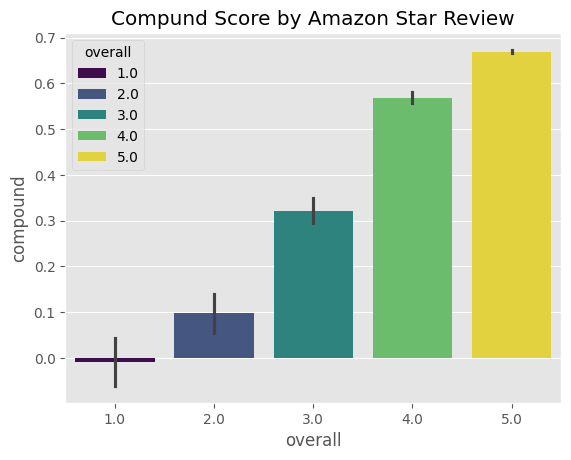

In [76]:
ax = sns.barplot(data=vaders, x='overall',hue='overall', y='compound',palette='viridis')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

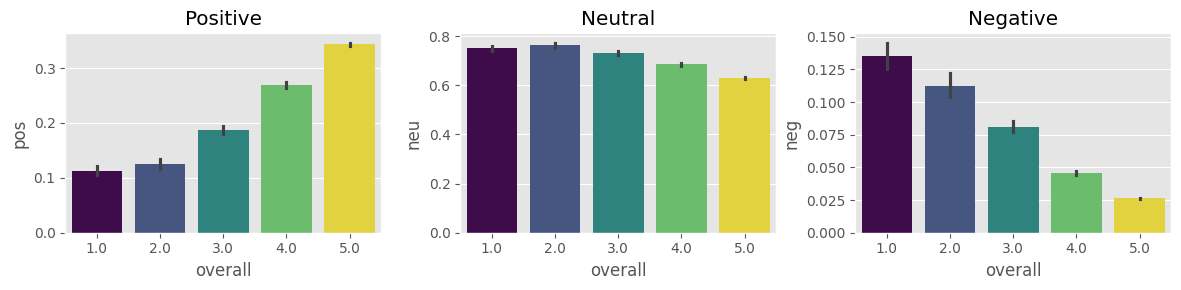

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall',hue='overall',y='pos', ax=axs[0],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neu', ax=axs[1],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neg', ax=axs[2],palette='viridis')
axs[0].set_title('Positive')
axs[0].get_legend().remove()
axs[1].set_title('Neutral')
axs[1].get_legend().remove()
axs[2].set_title('Negative')
axs[2].get_legend().remove()
plt.tight_layout()
plt.show()

In [80]:
# Define the thresholds
higher_threshold = 0.8  # Compound score above this value is considered high
lower_threshold = 0.2  # Compound score below this value is considered low
low_rating = 2  # Ratings at or below this are considered low
high_rating = 4  # Ratings at or above this are considered high

In [84]:
# Filter out unreasonable reviews
# Case 1: Reviews with high positive sentiment but low Amazon rating
print(vaders.shape)
#print(vaders.head())

unreasonable_case1 = vaders[(vaders['compound'] > higher_threshold) & (vaders['overall'] <= low_rating)]
print(unreasonable_case1.shape)
# Case 2: Reviews with high negative sentiment but high Amazon rating
unreasonable_case2 = vaders[(vaders['compound'] < lower_threshold) & (vaders['overall'] >= high_rating)]
print(unreasonable_case2.shape)
# Combine both cases (note: this assumes you want to consider both types of "unreasonable" reviews)
unreasonable_reviews = pd.concat([unreasonable_case1, unreasonable_case2])

# Get the list of "ID" values for the unreasonable reviews
unreasonable_ids = unreasonable_reviews['Id'].values
print(unreasonable_ids)

#Ensure the unique "Id" is the DataFrame index
#if vaders.index.name != 'ID':
#    vaders.set_index('ID', inplace=True)

# To remove these unreasonable reviews from the original DataFrame by the 'ID' index
#reasonable_reviews = vaders.drop(unreasonable_reviews.index, inplace=True)

# Drop the rows from `vaders` where the "ID" matches the IDs in `unreasonable_ids`
reasonable_reviews = vaders[~vaders['Id'].isin(unreasonable_ids)]

print(reasonable_reviews.shape)

(43117, 17)
(259, 17)
(3999, 17)
[   87   228   654 ... 43077 43080 43088]
(38859, 17)
